# Square Gradient Theory for Pure Components

This notebook has te purpose of showing examples of computing interfacial tension of pure fluids. This calculation is based on Square Gradient Theory, which for pure fluids allows computing the interfacial tension as follows:

$$ \sigma = \sqrt{2c_{ii}} \int_{\rho^v}^{\rho^l} \sqrt{a_0 - \rho \mu^0 + P^0} d\rho $$

Here, $\sigma$ represents the interfacial tension, $\rho^v$ and $\rho^l$ are the vapor and liquid molar densities, respectively, $P^0$ is the vapor pressure, $a_0$ is the Helmholtz energy density and $\mu^0$ is the equilibrium chemical potential. Both $a_0$ and $\mu^0$ are obtained from the EoS. Finally, $c_{ii}$ is the influence parameter.

SGT for pure fluids is implemented through the ``sgt_pure`` function. First, it's needed to import the necessary modules

In [1]:
import numpy as np
from phasepy import component, prsveos
from phasepy.sgt import sgt_pure

In [2]:
#component creation
water =  component(name = 'Water', Tc = 647.13, Pc = 220.55, Zc = 0.229, Vc = 55.948, w = 0.344861,
                ksv = [ 0.87185176, -0.06621339], cii = [2.06553362e-26, 2.64204784e-23, 4.10320513e-21])

#EoS object creation
eos = prsveos(water)

Now vapor-liquid equilibria has to be computed. This is done with the ``psat`` method from the EoS, which returns the pressure and densities at equilibrium.

Alternatively, you can use the ``tsat`` method to compute equilibrium temperature and densities at given pressure.

In [3]:
T = 350. #K
Psat, vl, vv = eos.psat(T)
rhol = 1/vl  # mol/cm3
rhov = 1/vv  # mol/cm3

Once the phase equilibrium is computed, the interfacial tension can be computed as follow:

In [4]:
tension = sgt_pure(rhov, rhol, T, Psat, eos, full_output = False)
tension

array([63.25083234])

If all the calculated information is desired, the ```full_output``` options allow obtaining, density profiles, interfacial tension and grand thermodynamic potential.

In [5]:
solution = sgt_pure(rhol, rhov, T, Psat, eos, full_output = True)

Text(0, 0.5, '$\\rho$ / cm$^3$ mol$^{-1}$')

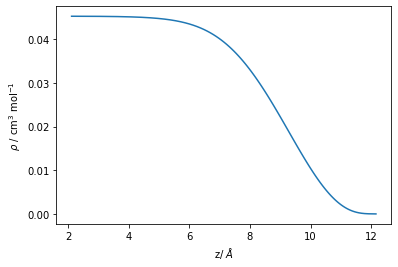

In [6]:
import matplotlib.pyplot as plt
z = solution.z
rho = solution.rho
plt.plot(z, rho)
plt.xlabel(r'z/ $\AA$')
plt.ylabel(r'$\rho$ / cm$^3$ mol$^{-1}$')

The procedure can be repeated in a for loop, allowing to study the interfacial behavior against the temperature. The results can be compared against experimental data.

In [7]:
#Experimental Saturation Data of water obtained from NIST
#Saturation Temperature in Kelvin
Tsat = np.array([290., 300., 310., 320., 330., 340., 350., 360., 370., 380.]) 

#Interfacial Tension in mN/m
tension = np.array([73.21 , 71.686, 70.106, 68.47 , 66.781, 65.04 , 63.248, 61.406,
       59.517, 57.581]) 

ten_sgt = np.zeros_like(tension)
n = len(Tsat)

for i in range(n):
    P, vl, vv = eos.psat(Tsat[i])
    rhol = 1/vl
    rhov = 1/vv
    ten_sgt[i] = sgt_pure(rhol, rhov, Tsat[i], P, eos, full_output = False)

C:\Users\Gusta\anaconda3\lib\site-packages\phasepy-0.0.49-py3.8-win-amd64.egg\phasepy\sgt\sgtpure.py:86: RuntimeWarning: invalid value encountered in sqrt
  tenint = np.nan_to_num(np.sqrt(2*dOm))


Text(0, 0.5, 'IFT / mN/m')

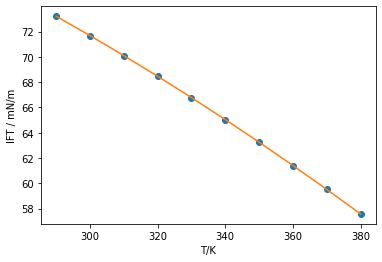

In [8]:
plt.plot(Tsat, tension, 'o')
plt.plot(Tsat, ten_sgt)
plt.xlabel('T/K')
plt.ylabel('IFT / mN/m')

For further information please also check [official documentation](https://phasepy.readthedocs.io/), or just try:

```function?```